# Chapter 3: Introduction to Machine Learning in Python
## Sections 3.3 -- 3.4

**Topics covered today:**
- 3.3 Modeling workflow in scikit-learn
- 3.4 Bias-variance tradeoff

---
## Setup: Import Libraries

Before we begin, let's import all the libraries we will use today.

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn tools (we will discuss each of these as we go)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Plot settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("All imports successful!")

All imports successful!


---
# 3.3 Modeling Workflow in scikit-learn
---

## What is scikit-learn?

**scikit-learn** is the most widely used Python library for supervised and unsupervised machine learning.

Key vocabulary:
- An **estimator** is a scikit-learn object that implements a machine learning model or algorithm.
  - Example: `LinearRegression()` is an estimator for simple linear regression.
- Estimators share common methods: `.fit()`, `.predict()`, `.score()`.

The **modeling workflow** in scikit-learn has five main steps:

| Step | Description | Code pattern |
|------|-------------|-------------|
| 1 | Define input features (X) and output feature (y) | `X = df[["col1", "col2"]]`  `y = df[["target"]]` |
| 2 | Initialize an estimator | `model = LinearRegression()` |
| 3 | Fit the estimator | `model.fit(X_train, y_train)` |
| 4 | Make predictions | `pred = model.predict(X_test)` |
| 5 | Evaluate the estimator | `model.score(X_test, y_test)` |

Let's walk through each step using a real dataset.

## Step 0: Load and Explore the Data

scikit-learn includes several built-in datasets so you can practice without downloading files.

We will use the **California Housing** dataset:
- Each row represents a census block group in California.
- The goal is to predict the **median house value** (in units of $100,000) from features like median income, house age, and average number of rooms.

In [2]:
# Load the California Housing dataset from scikit-learn
housing = fetch_california_housing()

# What does this object contain?
print("Keys:", dir(housing))
print()
print("Feature names:", housing.feature_names)
print("Target name:", housing.target_names)
print("Number of samples:", housing.data.shape[0])
print("Number of features:", housing.data.shape[1])

Keys: ['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name: ['MedHouseVal']
Number of samples: 20640
Number of features: 8


### Converting to a pandas DataFrame

scikit-learn returns data as NumPy arrays, but pandas DataFrames are more convenient for exploration and work naturally with seaborn.

In [3]:
# Convert to a pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target column
df["MedHouseVal"] = housing.target

print("Original dataset size:", len(df))

# The dataset caps house values at $500,001 (5.0001 in units of $100k).
# These capped values create a misleading spike and distort our analysis.
# We remove them using a simple pandas filter.
df = df[df["MedHouseVal"] < 5.0]

print("After removing capped values:", len(df), "rows remain")

# Preview the first few rows
df.head()

Original dataset size: 20640
After removing capped values: 19648 rows remain


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Quick summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,3.676411,28.373066,5.361708,1.096621,1441.368485,3.096560,35.651872,-119.562378,1.920553
std,1.570602,12.504050,2.293321,0.452136,1144.075196,10.639195,2.150066,2.005760,0.971109
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.526300,18.000000,4.416667,1.005882,796.000000,2.446614,33.930000,-121.760000,1.164750
50%,3.449050,28.000000,5.185730,1.048576,1179.000000,2.837779,34.270000,-118.500000,1.736000
75%,4.582500,37.000000,5.971083,1.099222,1746.250000,3.306021,37.730000,-117.990000,2.479000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.991000


## Exploratory Data Analysis (EDA) with Visualization

Before building a model, we should explore the data visually.
We will use **seaborn** and **matplotlib** -- two of the most popular Python plotting libraries.

- **seaborn**: high-level library that works well with DataFrames
- **matplotlib**: lower-level library for fine-grained control (labels, titles, annotations)

Since seaborn is built on top of matplotlib, we can combine them freely.

### Histogram with seaborn

A **histogram** shows the distribution of a single numerical feature.
The x-axis shows ranges of values ("bins"), and the y-axis shows counts.

`sns.histplot(data=df, x="column_name")`

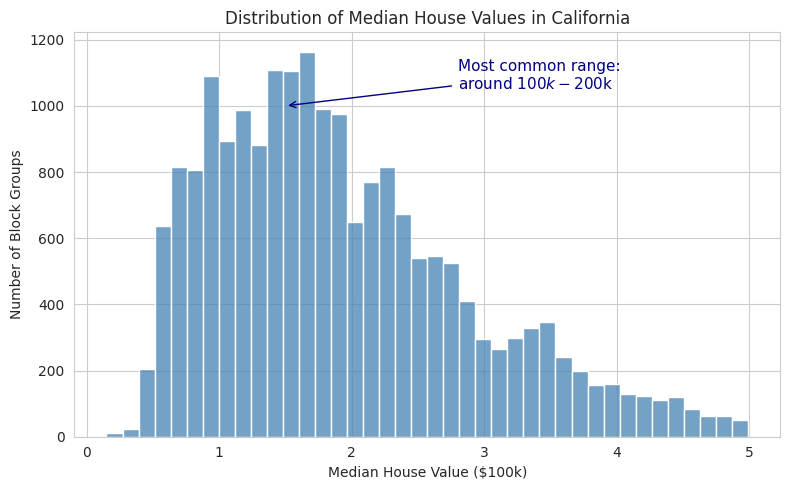

In [6]:
# TODO: Create a histogram of MedHouseVal using sns.histplot()
# Use: data=df, x="MedHouseVal", bins=40, color="steelblue"
sns.histplot(data=df, x="MedHouseVal", bins=40, color="steelblue")

# Customize with matplotlib (provided)
plt.xlabel("Median House Value ($100k)")
plt.ylabel("Number of Block Groups")
plt.title("Distribution of Median House Values in California")

# Add an annotation pointing out the most common range
plt.annotate("Most common range:\naround $100k - $200k",
             xy=(1.5, 1000), xytext=(2.8, 1050),
             arrowprops=dict(arrowstyle="->", color="navy"),
             fontsize=11, color="navy")

plt.tight_layout()
plt.show()

### Scatterplot with seaborn

A **scatterplot** shows the relationship between two numerical features.

`sns.scatterplot(data=df, x="col1", y="col2")`

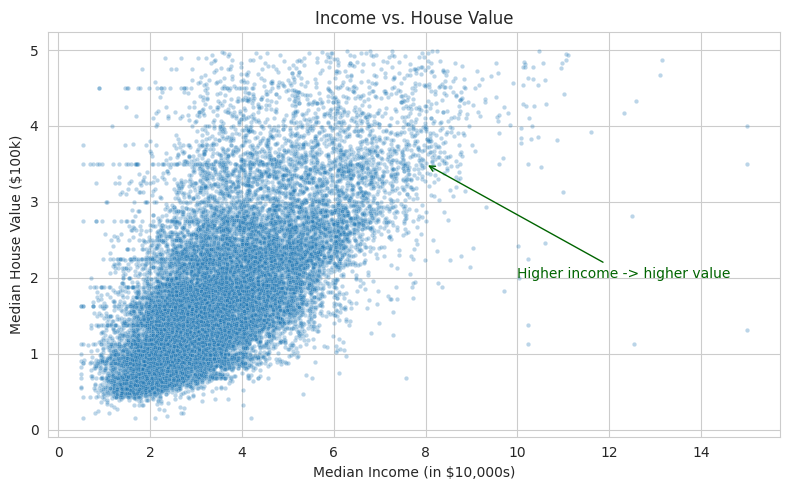

In [7]:
# TODO: Create a scatterplot of MedInc (x) vs MedHouseVal (y) using sns.scatterplot()
# Use: data=df, x="MedInc", y="MedHouseVal", alpha=0.3, s=10
sns.scatterplot(data=df, x="MedInc", y="MedHouseVal", alpha=0.3, s=10)

# matplotlib customization (provided)
plt.xlabel("Median Income (in $10,000s)")
plt.ylabel("Median House Value ($100k)")
plt.title("Income vs. House Value")

# Annotate a region of interest
plt.annotate("Higher income -> higher value",
             xy=(8, 3.5), xytext=(10, 2.0),
             arrowprops=dict(arrowstyle="->", color="darkgreen"),
             fontsize=10, color="darkgreen")

plt.tight_layout()
plt.show()

### Countplot with seaborn

A **countplot** shows counts of each level of a categorical feature.
Our `HouseAge` feature is numerical (in years), but it is already reported as whole numbers (integers), so a countplot can show the count of block groups at each age.

`sns.countplot(data=df, x="column_name")`

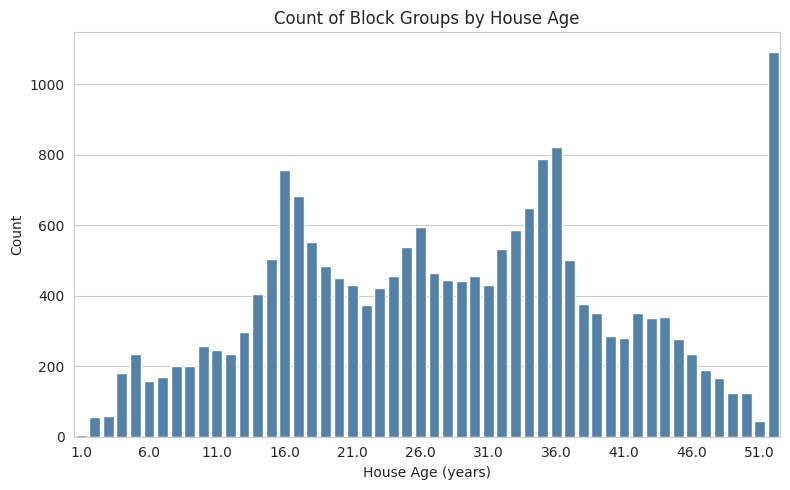

In [8]:
# TODO: Create a countplot of HouseAge using sns.countplot()
# Use: data=df, x="HouseAge", color="steelblue"
sns.countplot(data=df, x="HouseAge", color="steelblue")

# matplotlib customization (provided)
plt.xlabel("House Age (years)")
plt.ylabel("Count")
plt.title("Count of Block Groups by House Age")

# Show every 5th tick to avoid crowding the x-axis
plt.xticks(range(0, int(df["HouseAge"].max()) + 1, 5))

plt.tight_layout()
plt.show()

### Quick Reflection

**Think about it (30 seconds):**

Looking at the scatterplot of income vs. house value, do you think a straight line could capture the relationship well? Why or why not?

*(We will revisit this question in Section 3.4.)*

---
## Step 1: Define Input and Output Features

In scikit-learn, we separate the data into:
- **X** -- a DataFrame (or array) of input features
- **y** -- a Series (or array) of the output feature we want to predict

We use **double brackets** `[["col"]]` to keep X as a DataFrame (required by most estimators).

For a simple first model, let's predict `MedHouseVal` using just `MedInc` (median income).

In [9]:
# TODO: Define X and y
# X should be df[["MedInc"]]  (a DataFrame with one column)
# y should be df["MedHouseVal"]  (a Series)

X = df[["MedInc"]]
y = df["MedHouseVal"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print()
print("First 5 rows of X:")
print(X.head())
print()
print("First 5 values of y:")
print(y.head())

X shape: (19648, 1)
y shape: (19648,)

First 5 rows of X:
   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462

First 5 values of y:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


## Train-Test Split

Before fitting a model, we split the data into **training** and **test** sets:
- **Training set**: used to fit (train) the model
- **Test set**: held out to evaluate how the model performs on unseen data

This prevents us from evaluating the model on the same data it learned from.

`train_test_split(X, y, test_size=0.2, random_state=42)`

- `test_size=0.2` means 20% of the data goes to the test set
- `random_state=42` ensures we get the same split every time (reproducibility)

In [10]:
# TODO: Use train_test_split to split X and y into training and test sets
# Store results in: X_train, X_test, y_train, y_test
# Use test_size=0.2 and random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:    ", X_test.shape[0])

Training set size: 15718
Test set size:     3930


## Step 2: Initialize an Estimator

**Initialization** creates an estimator object in your Python workspace.

The general pattern is:

```python
from sklearn.module import EstimatorName
model = EstimatorName(parameters)
```

For linear regression:

In [11]:
# TODO: Initialize a LinearRegression() estimator and store it in linear_model

linear_model = LinearRegression()

# The object exists but has not learned anything yet
print(linear_model)

LinearRegression()


## Step 3: Fit the Estimator

The `.fit()` method trains the model on the training data.
For regression, this means estimating the **intercept** and **coefficients** (weights).

`model.fit(X_train, y_train)`

In [12]:
# TODO: Fit the model to the training data using .fit()

linear_model.fit(X_train, y_train)

# Examine the learned parameters (provided)
print("Intercept (b0):", round(linear_model.intercept_, 4))
print("Coefficient (b1):", round(linear_model.coef_[0], 4))
print()
print("The model learned: MedHouseVal = {:.4f} + {:.4f} * MedInc".format(
    linear_model.intercept_, linear_model.coef_[0]))

Intercept (b0): 0.4511
Coefficient (b1): 0.3994

The model learned: MedHouseVal = 0.4511 + 0.3994 * MedInc


## Step 4: Make Predictions

The `.predict()` method calculates predicted output values for a set of inputs.
Predicted values are often called **y-hat**.

We can predict on the test set (unseen data) or even on new custom values.

In [13]:
# TODO: Use linear_model.predict() on X_test and store in y_pred

y_pred = linear_model.predict(X_test)

# Show a few predictions vs actual values (provided)
comparison = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10].round(3)
})
print(comparison.to_string(index=False))

 Actual  Predicted
  3.298      2.463
  2.947      2.353
  1.957      2.383
  1.615      1.681
  2.750      1.890
  1.370      2.552
  2.660      2.953
  0.813      0.947
  0.928      1.485
  2.737      2.662


In [14]:
# Predict on custom new values (provided)
new_incomes = pd.DataFrame({"MedInc": [2.0, 5.0, 10.0]})
new_predictions = linear_model.predict(new_incomes)

for inc, pred in zip(new_incomes["MedInc"], new_predictions):
    print(f"Median income ${inc*10000:.0f} -> predicted house value ${pred*100000:.0f}")

Median income $20000 -> predicted house value $125002
Median income $50000 -> predicted house value $244836
Median income $100000 -> predicted house value $444559


## Step 5: Evaluate the Estimator

We need to measure how well our predictions match reality.

For **regression** models, the two most common metrics are:

**Mean Squared Error (MSE)** -- the average of squared prediction errors:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**R-squared** ($R^2$) -- the proportion of variance in $y$ explained by the model:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

| Metric | Ideal value | Interpretation |
|--------|-------------|---------------|
| **MSE** | 0.0 (lower is better) | Average squared error between predictions and actual values |
| $R^2$ | 1.0 (higher is better) | Fraction of variance in $y$ explained by the model |

- `model.score(X, y)` returns $R^2$ for regression estimators.
- For **classification** models, `.score()` returns **accuracy** instead.

In [ ]:
# TODO: Compute R-squared on the training set and test set using linear_model.score()

r2_train = linear_model.score()
r2_test  = linear_model.score()

print("R-squared (training): {:.4f}".format(r2_train))
print("R-squared (test):     {:.4f}".format(r2_test))
print()

# TODO: Compute MSE on training and test sets using mean_squared_error()

mse_train = ___
mse_test  = ___

print("MSE (training): {:.4f}".format(mse_train))
print("MSE (test):     {:.4f}".format(mse_test))

### Visualizing Predictions vs. Actual Values

In [ ]:
# Scatter plot: actual vs predicted on the test set
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.3, s=10, color="steelblue")
plt.plot([0, 5], [0, 5], color="red", linestyle="--", label="Perfect prediction")

plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Actual vs. Predicted Values (Linear Regression)")

plt.annotate("Perfect predictions\nfall on this line",
             xy=(1.5, 1.5), xytext=(0.5, 3.5),
             arrowprops=dict(arrowstyle="->", color="red"),
             fontsize=10, color="red")

plt.legend()
plt.tight_layout()
plt.show()

### The scikit-learn Cycle -- Summary

Every scikit-learn model follows the same pattern:

```
1. Import    -->  from sklearn.module import Estimator
2. Instantiate --> model = Estimator()
3. Fit        -->  model.fit(X_train, y_train)
4. Predict    -->  y_pred = model.predict(X_test)
5. Evaluate   -->  model.score(X_test, y_test)
```

This cycle works for **any** estimator in scikit-learn -- linear regression, decision trees, k-nearest neighbors, and many more.

### Quick Reflection

**Think about it (30 seconds):**

Our R-squared was about 0.47 on the test set. That means the model explains roughly 47% of the variation in house value using income alone.

1. Is that good or bad?
2. What could we do to improve it?

*(Hint: we only used one feature. What if we used more? What if the relationship is not a straight line?)*

---
# 3.4 Bias-Variance Tradeoff
---

## Learning Objectives

By the end of this section you will be able to:

1. Define **bias** and **variance** in the context of prediction errors.
2. Distinguish between **error variance** and **prediction variance**.
3. Define **underfitting** and **overfitting**.
4. Determine whether a model is underfitted or overfitted using training and test error.
5. Explain the **bias-variance tradeoff**.

## Bias

The **prediction error** (also called a **residual**) for a single data point $i$ is:

$$e_i = y_i - \hat{y}_i$$

where $y_i$ is the observed value and $\hat{y}_i$ (pronounced "y-hat") is the predicted value.

**Bias** is the **mean** prediction error across all $n$ data points:

$$\text{Bias} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) = \frac{1}{n} \sum_{i=1}^{n} e_i$$

- A model with **low bias** has predictions centered around the true values.
- A model with **high bias** systematically over- or under-predicts.

Example: Least squares linear regression is guaranteed to have $\text{Bias} = 0$ on the training data (the positive and negative errors cancel out). But on new data, a model that is too simple may have nonzero bias.

## Error Variance

**Variance** in general is the average squared difference between values and their mean.

**Error variance** is the variance of the model's prediction errors:

$$\text{Error Variance} = \frac{1}{n} \sum_{i=1}^{n} (e_i - \bar{e})^2$$

where $e_i = y_i - \hat{y}_i$ is the prediction error for data point $i$, and $\bar{e}$ is the mean error (the bias).

- **Low error variance**: prediction errors are consistently small and similar in size.
- **High error variance**: some predictions are very good and others are very bad.

**A good model should have both low bias AND low error variance.**

## The Target Analogy

Imagine each prediction is like throwing a dart at a target:

| | Low Error Variance | High Error Variance |
|---|---|---|
| **Low Bias** | Darts clustered tightly around the bullseye. *Best case!* | Darts centered on the bullseye but scattered widely. |
| **High Bias** | Darts clustered tightly but off-center. | Darts scattered and off-center. *Worst case!* |

The best model hits the bullseye (low bias) consistently (low error variance).

## Prediction Variance

**Prediction variance** is the variance of the **predicted values** $\hat{y}$, not the errors:

$$\text{Prediction Variance} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - \bar{\hat{y}})^2$$

where $\bar{\hat{y}}$ is the mean of the predicted values.

Key relationship:

- Models with **low error variance** tend to have **high prediction variance**.
  - The predicted values vary enough to closely track the observed values, so errors are small.
- Models with **high error variance** tend to have **low prediction variance**.
  - The predicted values do not vary much (e.g., close to a flat line), so errors are larger.

In other words, error variance and prediction variance are **inversely related**.

### Quick Reflection

**Think about it (30 seconds):**

A model predicts the exact same value for every input. What can you say about its prediction variance and error variance?

*(Answer: prediction variance is 0, error variance is very high.)*

## Underfitting vs. Overfitting

| Term | Meaning | What happens |
|------|---------|-------------|
| **Underfitting** | Model is **too simple** to capture the pattern in the data | High bias, low prediction variance. Performs poorly on *both* training and test data. |
| **Overfitting** | Model is **too complex** and memorizes noise in the training data | Low bias on training data, but high error on test data. Does not generalize. |
| **Good fit** | Model captures the general trend without memorizing noise | Reasonable performance on both training and test data. |

**How to detect underfitting vs. overfitting:**

| Condition | Training Error | Test Error | Diagnosis |
|-----------|---------------|------------|-----------|
| Both high | High | High | Underfitting |
| Train low, test high | Low | High | Overfitting |
| Both reasonably low | Low | Low (similar to train) | Good fit |

## The Bias-Variance Tradeoff

**Mean Squared Error (MSE)** can be decomposed into three components:

$$\text{MSE} = \text{Bias}^2 + \text{Prediction Variance} + \sigma^2$$

where $\sigma^2$ is the **irreducible error** -- noise in the data that no model can eliminate.

- As model complexity **increases**: $\text{Bias}^2$ decreases, but prediction variance increases.
- As model complexity **decreases**: $\text{Bias}^2$ increases, but prediction variance decreases.

The **bias-variance tradeoff** says we cannot minimize both at the same time.
The **optimal model** finds a balance -- complex enough to capture the real pattern, but not so complex that it memorizes noise.

The total error (MSE) follows a **U-shape** as a function of model complexity:
- The left side of the U corresponds to high $\text{Bias}^2$ (underfitting).
- The right side of the U corresponds to high prediction variance (overfitting).
- The optimal complexity is at the bottom of the U.

---
## Demonstration: Measuring Bias, Error Variance, and Prediction Variance

Let's use our simple linear regression model (MedInc -> MedHouseVal) to **compute and visualize** the three key quantities on the test set:

- **Bias** -- the mean prediction error
- **Error Variance** -- how spread out the errors are
- **Prediction Variance** -- how spread out the predictions are

In [ ]:
# We already have linear_model fitted from Section 3.3
# Predict on the test set
y_pred_test = linear_model.predict(X_test)

# Compute prediction errors (residuals): e_i = y_i - y_hat_i
errors = y_test.values - y_pred_test

# TODO: Compute Bias (mean of errors), Error Variance (variance of errors),
#       and Prediction Variance (variance of predicted values)

bias      = ___   # Hint: errors.mean()
error_var = ___   # Hint: errors.var()
pred_var  = ___   # Hint: y_pred_test.var()

# MSE (provided)
mse = mean_squared_error(y_test, y_pred_test)

print("--- Simple Linear Regression: MedInc -> MedHouseVal ---")
print(f"  Bias               = {bias:.4f}")
print(f"  Bias^2             = {bias**2:.6f}")
print(f"  Error Variance     = {error_var:.4f}")
print(f"  Prediction Variance = {pred_var:.4f}")
print(f"  MSE (test)         = {mse:.4f}")
print()
print("Interpretation:")
print(f"  The model's errors average to {bias:.4f} (close to 0 = low bias).")
print(f"  But the errors vary a lot (error variance = {error_var:.4f}).")
print(f"  The predictions only vary by {pred_var:.4f} -- the line does not")
print(f"  spread enough to capture the full range of house values.")

### Visualizing the Errors

Let's plot the prediction errors to see their distribution and how they relate to the input feature.

In [ ]:
# Plot 1: Histogram of prediction errors
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: error distribution
axes[0].hist(errors, bins=40, color="steelblue", edgecolor="white")
axes[0].axvline(bias, color="red", linewidth=2, linestyle="--", label=f"Bias (mean error) = {bias:.3f}")
axes[0].set_xlabel("Prediction Error (y - y_hat)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Prediction Errors")
axes[0].legend()

# Right: errors vs MedInc
axes[1].scatter(X_test["MedInc"], errors, alpha=0.3, s=10, color="steelblue")
axes[1].axhline(0, color="red", linewidth=1.5, linestyle="--", label="Zero error")
axes[1].axhline(bias, color="darkgreen", linewidth=1.5, linestyle=":", label=f"Bias = {bias:.3f}")
axes[1].set_xlabel("Median Income ($10,000s)")
axes[1].set_ylabel("Prediction Error")
axes[1].set_title("Errors vs. Income")
axes[1].legend()

plt.tight_layout()
plt.show()

print("Left: Most errors cluster near zero, but there is a long tail -- high error variance.")
print("Right: Errors are larger for middle-income areas -- the straight line misses curvature.")